# Проверочная 2 группа ММР14

# Влияние различных факторов на выплату страховой премии

### Антипина Линда Виктория Игоревна

Датасет содержит информацию о страхователях. Датасет имеет такие атрибуты, как срок владения полисом, возраст автомобиля, возраст владельца автомобиля, плотность населения города, марка и модель автомобиля, мощность, тип двигателя и т. д., а также целевая переменная, указывающая подаст ли страхователь претензию в течение следующих 6 месяцев или нет.

Загрузим библиотеки которые могут нам пригодиться

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import scipy as scipy
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_score, recall_score , accuracy_score, f1_score

In [2]:
dataset = pd.read_csv('/Users/komasomas/Downloads/archive-2/train.csv') 
dataset.head() #подгрузим датасет и посмотрим из чего он состоит

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [3]:
dataset.info() #посмотрим на типы колонок и пропущенные значения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [4]:
dataset['max_power'] #видим что результат строковый

0         40.36bhp@6000rpm
1         40.36bhp@6000rpm
2         40.36bhp@6000rpm
3         88.50bhp@6000rpm
4         67.06bhp@5500rpm
               ...        
58587     67.06bhp@5500rpm
58588     40.36bhp@6000rpm
58589     40.36bhp@6000rpm
58590     88.50bhp@6000rpm
58591    113.45bhp@4000rpm
Name: max_power, Length: 58592, dtype: object

In [5]:
dataset['max_power'] = dataset['max_power'].astype(str)  # приведем к численному значению
dataset['max_power'] = dataset['max_power'].str.split('b').str[0].astype(float)
dataset['max_power']

0         40.36
1         40.36
2         40.36
3         88.50
4         67.06
          ...  
58587     67.06
58588     40.36
58589     40.36
58590     88.50
58591    113.45
Name: max_power, Length: 58592, dtype: float64

### Посмотрим на наши данные, для этого применим различные визуализации

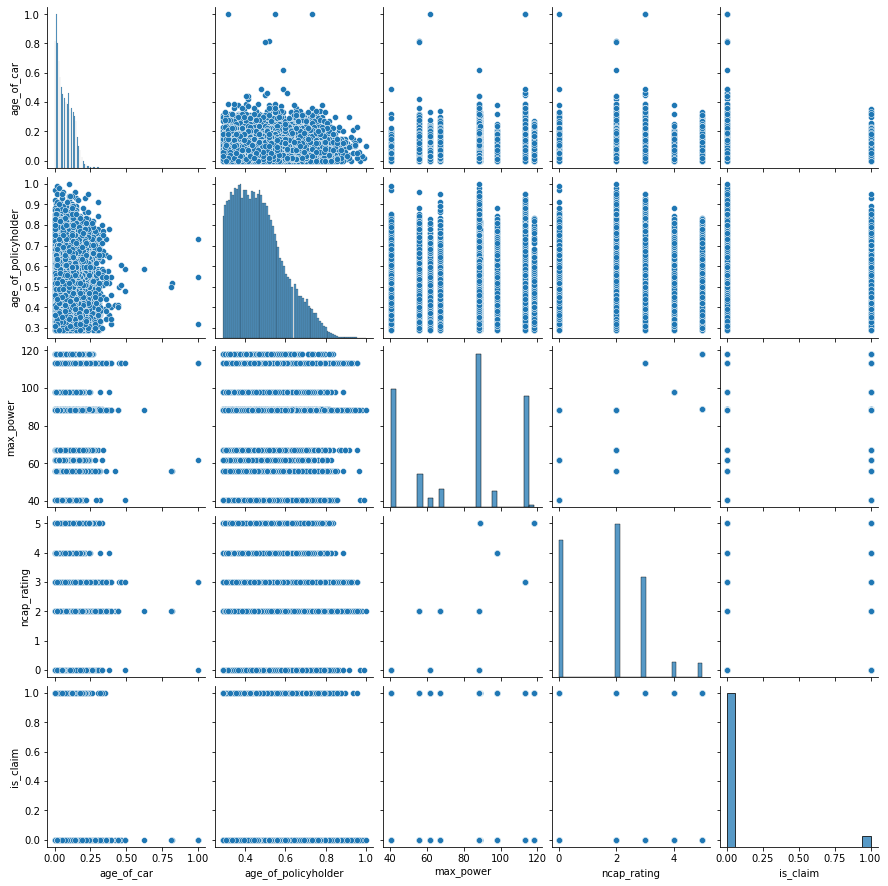

In [6]:
sns.pairplot(dataset[['age_of_car','age_of_policyholder','area_cluster','segment','model','max_power','ncap_rating', 'is_claim']])

<AxesSubplot:xlabel='max_power', ylabel='Density'>

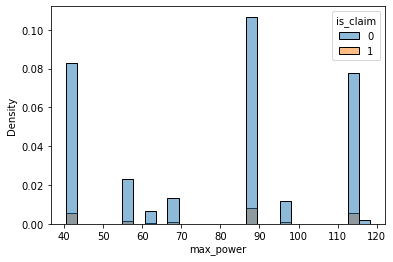

In [7]:
# посмотрим на распределение мощности машин в разрезе страховых случаев
sns.histplot(data = dataset, x = 'max_power' , hue = 'is_claim', stat = 'density')

[Text(0, 0.5, 'Segment'), Text(0.5, 0, 'Power')]

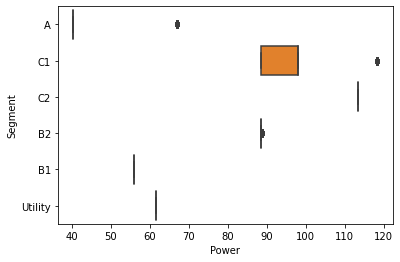

In [8]:
sns.boxplot(x='max_power', y="segment", data=dataset).set(ylabel='Segment', xlabel='Power') #Посмотрим распределение мощностей машин по сегментам

In [9]:
#### Мы видим, что разнообразие машин в каждом сегменте невелико

<AxesSubplot:xlabel='is_claim', ylabel='Count'>

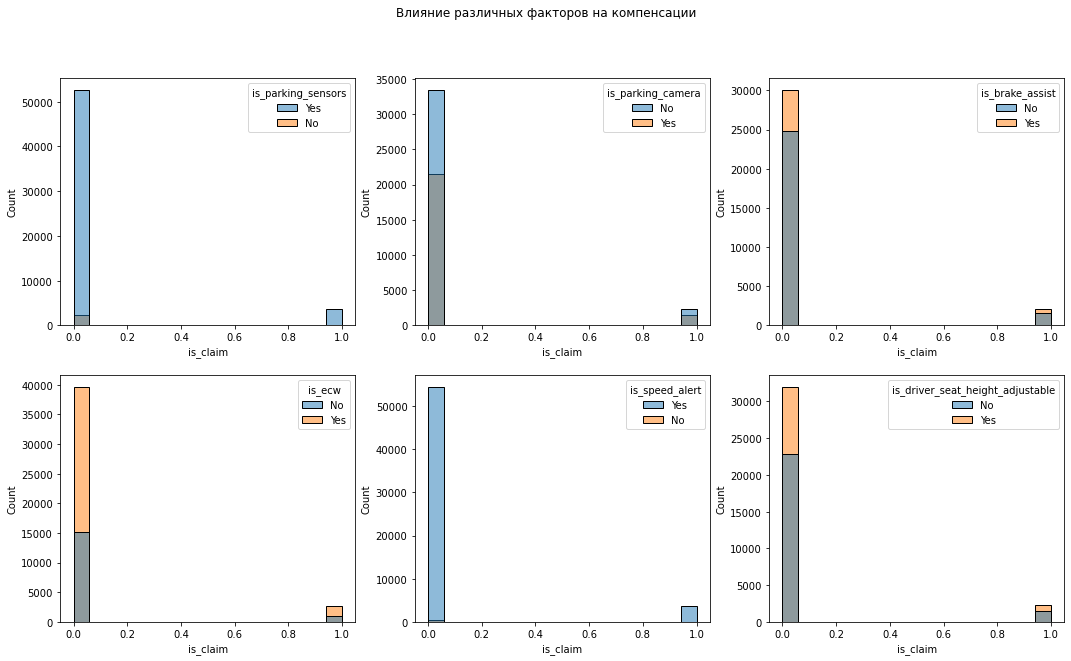

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  #Посмотрим как наличие некоторых опций может влиять на вероятность обращения за страховкой
 
fig.suptitle('Влияние различных факторов на компенсации')
  
sns.histplot(ax=axes[0, 0], data=dataset, x='is_claim', hue='is_parking_sensors')
sns.histplot(ax=axes[0, 1], data=dataset, x='is_claim', hue='is_parking_camera')
sns.histplot(ax=axes[0, 2], data=dataset, x='is_claim', hue='is_brake_assist')
sns.histplot(ax=axes[1, 0], data=dataset, x='is_claim', hue='is_ecw')
sns.histplot(ax=axes[1, 1], data=dataset, x='is_claim', hue='is_speed_alert')
sns.histplot(ax=axes[1, 2], data=dataset, x='is_claim', hue='is_driver_seat_height_adjustable')

<AxesSubplot:xlabel='segment', ylabel='Density'>

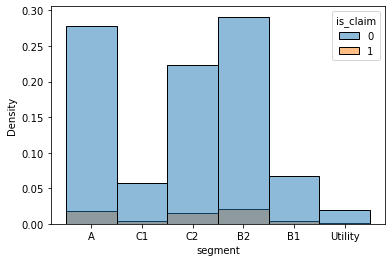

In [11]:
# посмотрим как часто различные сегменты машин попадают под страховку
sns.histplot(data = dataset, x = 'segment' , hue = 'is_claim', stat = 'density')

### Проверка гипотезы 1
Сделаем предположение, что сегмент машины не влияет на обращения за компенсацией

Тогда гипотеза выглядит следующим образом



H0: Не существует зависимости между сегментом машины и обращениями за компенсацией

H1: Существует стат. значимая зависимость между сегментом машины и обращениями за компенсацией

In [12]:
ct_0 = dataset.groupby('segment')['is_claim'].value_counts().unstack()
ct_0

is_claim,0,1
segment,,
A,16275,1046
B1,3929,244
B2,17058,1256
C1,3329,228
C2,13117,901
Utility,1136,73


In [13]:
chi_2, p_val, dof, expected = scipy.stats.chi2_contingency(ct_0, correction = False)

output = "chi_2: {}\ndegrees of freedom: {}\np-value: {}\n"
print(output.format(chi_2,dof, p_val))

chi_2: 12.603887499528136
degrees of freedom: 5
p-value: 0.02738747673628079



In [14]:
alpha = 0.05 
critical_value = scipy.stats.chi2.ppf(0.95, 5)
critical_value


11.070497693516351

In [15]:
if chi_2 >= critical_value:   #Проверяем H0
    print('Отвергаем Н0')
else:
    print('Не отвергаем Н0')

Отвергаем Н0


In [16]:
if p_val < alpha:             #и еще раз проверяем H0
    print('Отвергаем Н0')
else:
    print('Не отвергаем Н0')

Отвергаем Н0


### Таким образом мы видим, что существует статистически значимая зависимость между сегментом машины и страховым случаем

### Проверка гипотезы 2
Сделаем предположение, что наличие ассистента торможения не влияет на обращения за компенсацией
Тогда гипотеза выглядит следующим образом
H0: Не существует зависимости между ассистентом торможения и обращениями за компенсацией
H1: Существует стат. значимая зависимость между ассистентом торможения и обращениями за компенсацией

In [17]:
ct_1 = dataset.groupby('is_brake_assist')['is_claim'].value_counts().unstack()
ct_1

chi_2, p_val, dof, expected = scipy.stats.chi2_contingency(ct_1, correction = False)

output = "chi_2: {}\ndegrees of freedom: {}\np-value: {}\n"
print(output.format(chi_2,dof, p_val))

alpha = 0.05 
critical_value = scipy.stats.chi2.ppf(0.95, dof)
print ('critical value = ', critical_value)

if chi_2 >= critical_value:   #Проверяем H0
    print('Отвергаем Н0')
else:
    print('Не отвергаем Н0')

chi_2: 6.952338076207642
degrees of freedom: 1
p-value: 0.008370975875391155

critical value =  3.841458820694124
Отвергаем Н0


### Таким образом мы видим, что существует статистически значимая зависимость между наличием ассистента торможения и страховым случаем

### Проверка гипотезы 3
Сделаем предположение, что наличие камеры не влияет на обращения за компенсацией
Тогда гипотеза выглядит следующим образом
H0: Не существует зависимости между наличием камеры и обращениями за компенсацией
H1: Существует стат. значимая зависимость между наличием камеры и обращениями за компенсацией

In [18]:
ct_2 = dataset.groupby('is_parking_camera')['is_claim'].value_counts().unstack()
ct_2

chi_2, p_val, dof, expected = scipy.stats.chi2_contingency(ct_2, correction = False)

output = "chi_2: {}\ndegrees of freedom: {}\np-value: {}\n"
print(output.format(chi_2,dof, p_val))

alpha = 0.05 
critical_value = scipy.stats.chi2.ppf(0.95, dof)
print ('critical value = ', critical_value)

if chi_2 >= critical_value:   #Проверяем H0
    print('Отвергаем Н0')
else:
    print('Не отвергаем Н0')

chi_2: 0.044476992346785565
degrees of freedom: 1
p-value: 0.8329686668462002

critical value =  3.841458820694124
Не отвергаем Н0


### Таким образом мы видим, что наличие камеры заднего вида значимо не влияет на обращения за компенсациями

### Проверим как различные переменные влияют на вероятность выплаты страховки

Для этого используем модель логистической регрессии. Нормируем независимые переменные для лучшей интерпретации результатов.

In [19]:


x = sm.add_constant(dataset[['age_of_car','age_of_policyholder','turning_radius','population_density']].apply(stats.zscore))
y = dataset['is_claim']

logr = sm.Logit(y, x)
log_res = logr.fit()
print(log_res.summary())

Optimization terminated successfully.
         Current function value: 0.236837
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               is_claim   No. Observations:                58592
Model:                          Logit   Df Residuals:                    58587
Method:                           MLE   Df Model:                            4
Date:                Tue, 13 Dec 2022   Pseudo R-squ.:                0.003834
Time:                        18:52:28   Log-Likelihood:                -13877.
converged:                       True   LL-Null:                       -13930.
Covariance Type:            nonrobust   LLR p-value:                 3.465e-22
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.6969      0.017   -157.684      0.000      -2.730      -2.663
ag

Мы видим что есть стат. значимые зависимости (возраст машины, возваст водителя, плотность населения). Причем каждый из признаков вносит сравнительно небольшой вклад. Причем чем старше машина, тем менее вероятно обращение за компенсацией - возможная причина это то, что чем старше машина, тем проще и дешевле самому отремонтировать ее в случае небольшой поломки, нежели повышать стоимость следующей страховки посредством фиксации дефекта, также чем старше человек, тем чаще он обращается за компенсацией - возможная причина в том, что с возрастом скорость реакции замедляется, что приводит к повышенной аварийности. Зависимость же от плотности населения представляется наименее очевидной, тк при увеличении плотности потока должна расти вероятность аварийной ситуации, однако исходя из результатов зависимость обратная.

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=10) #бьем данные на обучающую и тестовую выборку

In [21]:

Log_reg_model = LogisticRegression(penalty = 'l2', class_weight = 'balanced') # при прогонке без балансировки классов не было обнаружено предсказанных значений = 1, что делает модель фактически бесполезной
Log_reg_model.fit(x_train, y_train) #тренируем модель
y_pred = Log_reg_model.predict(x_test)
accuracy_score(y_test, y_pred)

#посмотим метрики качества модели
print('Accuracy :', accuracy_score(y_test, y_pred))  
print('F1_score: ', f1_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))  




Accuracy : 0.5100264527690076
F1_score:  0.1209430496019596
Precision:  0.0685763888888889
Recall:  0.5116580310880829


Исходя из полученных результатов (низкие метрики качества модели) можно заключить, что лог. регрессия не обладает достаточной предсказательной силой. Необзодимо использовать другую модель для предсказания результата.

Значение accuracy без балансировки классов было равно 0.93, в то время как другие метрики качества были = 0. Это значит что не было предсказанных положительных значений. И хотя формально accuracy была достаточно высокой, фактически модель с точки зрения бизнеса бесполезна тк не обладает предсказательной силой.